# Keras NLP - Text Classification
* Notebook by Adam Lang
* Date: 7/17/2024

# Overview
* In this notebook we will go over text classification using Keras NLP.
* The Keras API Philosophy is worth noting: *"Progressive disclosure of complexity."*

## Workflow
1. Inference with a pretrained classifier.
2. Fine-tuning a pretrained backbone model.
3. Fine-tuning with user-controlled preprocessing.
4. Fine-tuning a custom model.


## Custom preprocessing pipeline in Keras NLP
* Below is looking "under the hood" at the Keras NLP pipeline.
* source: Keras NLP

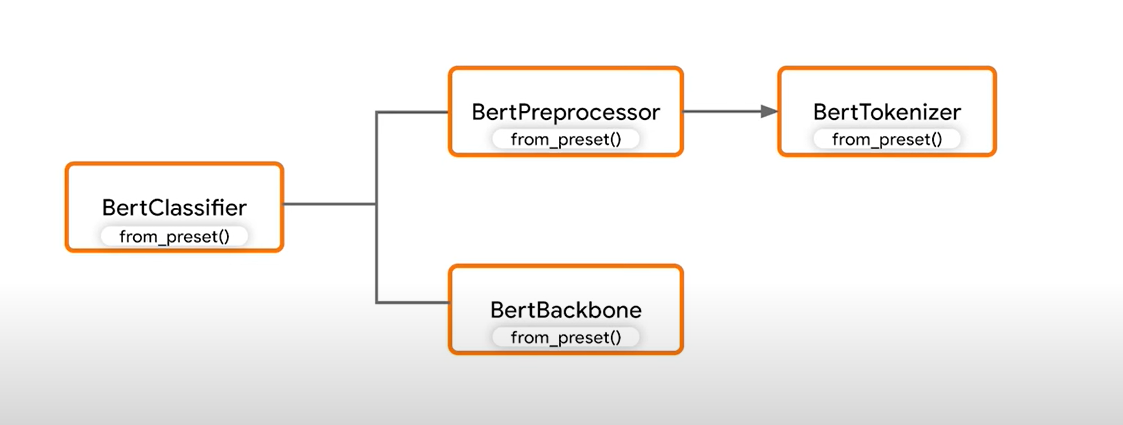


## Dataset preparation
* Stanford movie reviews

In [1]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

!tar -xf aclImdb_v1.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  5786k      0  0:00:14  0:00:14 --:--:-- 13.4M


## Feature Engineering
* Train and Test setup

In [2]:
!pip install --upgrade keras-nlp
!pip install --upgrade keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.8/571.8 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 87.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 96.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 86.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 102.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 79.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 30.9 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found ex

In [3]:
## import
import tensorflow as tf
import keras
import keras_nlp

In [4]:
## version of keras and tensorflow
print(keras.__version__)
print(tf.__version__)

3.4.1
2.17.0


In [5]:
## train and test setup in keras
BATCH_SIZE = 16

# train dataset
imdb_train = tf.keras.utils.text_dataset_from_directory(
    "aclImdb/train",
    batch_size=BATCH_SIZE,
)

# test dataset
imdb_test = tf.keras.utils.text_dataset_from_directory(
    "aclImdb/test",
    batch_size=BATCH_SIZE,
)

Found 75000 files belonging to 3 classes.
Found 25000 files belonging to 2 classes.


In [6]:
## dtypes
print(type(imdb_train))

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>


### Exploratory analysis
* Each example is a movie review.
* Each review is pre-labeled with positive or negative classifier sentiment.

In [7]:
## use keras to view data
print(imdb_train.unbatch().take(1).get_single_element())

(<tf.Tensor: shape=(), dtype=string, numpy=b'Mario Landi\'s PATRICK STILL LIVES is a weird little film that is weak on pretty much every level - but still manages to be entertaining and pretty fun to watch...<br /><br />Patrick is the victim of an unfortunate (and kinda hilarious...)accident: while standing by the side of the road, he\'s randomly hit in the face with a bottle that a passing motorist chucks out of his window, leaving poor Patrick in a coma, but with telekinetic powers (!!??!!) Patrick\'s scientist father owns a villa with a lab in the basement where he conducts experiments to strengthen Patrick\'s mind powers so that he can one day seek revenge for his condition. Dad lures several people to his villa with the intention of letting vegetable-boy wreak some havoc. This eventually does happen and the results are pretty rewarding...<br /><br />PATRICK STILL LIVES is a pretty good example of classic 70\'s/80\'s exploitation sleaze. Plenty of tits and ass (including a pretty h

# 1. Inference with a pretrained classifier
* We can easily create a BERT classifier using the `from_preset()` method.
* In this example we are taking a BERT model "backbone" and using it for inference.
   * Backbone model: `bert_tiny_en_uncased_sst2`
      * Parameters: 4.39M
      * Details: The bert_tiny_en_uncased backbone model fine-tuned on the SST-2 sentiment analysis dataset.
* Full list of backbone models: https://keras.io/api/keras_nlp/models/

In [8]:
## Backbone classifier setup/instantiation
classifier = keras_nlp.models.BertClassifier.from_preset("bert_tiny_en_uncased_sst2")



# predict on a test phrase
## keras expects BATCH inputs so string must be wrapped in an interable
classifier.predict(["I love modular workflows in keras-nlp!"])

100%|██████████| 145/145 [00:00<00:00, 302kB/s]


100%|██████████| 2.04k/2.04k [00:00<00:00, 2.29MB/s]


100%|██████████| 50.3M/50.3M [00:04<00:00, 11.0MB/s]
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 84 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


100%|██████████| 16.8M/16.8M [00:02<00:00, 6.06MB/s]


100%|██████████| 226k/226k [00:00<00:00, 304kB/s]


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[-1.2862443,  1.3915721]], dtype=float32)

### Evaluate on Test Data
* This will give us the loss and accuracy on the test data.

In [9]:
## evaluate test dataset
classifier.evaluate(imdb_test)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - loss: 0.4591 - sparse_categorical_accuracy: 0.7887


[0.45498523116111755, 0.7902799844741821]

# Summary:
* This classification wasn't bad, the accuracy was 0.790.
* Perhaps with preprocessing we can improve this.

# 2. Fine-tuning a pretrained BERT backbone
* We load the backbone model.
* We set the number of classification classes to 2 for positive or negative sentiment.

In [10]:
from keras_nlp import models as keras_nlp_models
from keras_nlp.models import BertClassifier
import numpy as np


In [11]:
## setup classifier
classifier = keras_nlp_models.BertClassifier.from_preset(
    "bert_tiny_en_uncased",
    num_classes=3,
)

## fit classifier on data
classifier.fit(
    imdb_train,
    validation_data=imdb_test,
    epochs=1,
)

100%|██████████| 139/139 [00:00<00:00, 145kB/s]


100%|██████████| 507/507 [00:00<00:00, 1.19MB/s]


100%|██████████| 16.8M/16.8M [00:02<00:00, 6.69MB/s]


100%|██████████| 547/547 [00:00<00:00, 619kB/s]


100%|██████████| 226k/226k [00:00<00:00, 298kB/s]


4688/4688 ━━━━━━━━━━━━━━━━━━━━ 148s 28ms/step - loss: 0.8258 - sparse_categorical_accuracy: 0.6609 - val_loss: 1.3617 - val_sparse_categorical_accuracy: 0.0074


# 3. Fine tuning with user-controlled preprocessing
* Here we are just adding another layer to the workflow.
* We add a custom preprocessing step. There are multiple ways to set the preprocessing parameters based on the dataset.
* Here we use the `bertpreprocessor` function which takes in the following arguments:
1. tokenizer
2. sequence length - length of packed inputs to model.
3. truncate
   * string
   * value can either be:
      * a. `round_robin` - available space is assigned 1 token at a time in "round-robin" style until limit reached.
      * b. `waterfall` - token quota filled left to right until max threshold is reached.

* `prefetch`
   * overlaps preprocessing and model execution of training step.
   * while model executes training, input pipeline is reading data for step s+1
   * this will reduce the step time to maximum (as opposed to sum) of training and the time it takes to extract data.

* `cache`
   * you can cache a dataset in tensorflow/keras in memory of in local storage.
   * general rule: cache small datasets in memory, large datasets in local storage.
   * This will save file opening and data reading from being executed each epoch.
      * The next epoch uses the cached data.

* `AUTOTUNE` - delegates level of parallelism during runtime.


Good resource: https://towardsdatascience.com/optimising-your-input-pipeline-performance-with-tf-data-part-1-32e52a30cac4

In [13]:
## 1. setup preprocessor
preprocessor = keras_nlp.models.BertPreprocessor.from_preset(
    "bert_tiny_en_uncased",
    sequence_length=512,
    truncate='round_robin',
)

# 2. preprocess and cache outputs
imdb_train_cached = (
    imdb_train.map(preprocessor,
                   tf.data.AUTOTUNE).cache().prefetch(tf.data.AUTOTUNE)
)

imdb_test_cached = (
    imdb_test.map(preprocessor,
                  tf.data.AUTOTUNE).cache().prefetch(tf.data.AUTOTUNE)
)

In [15]:
## train and fit classifier - same as before

# setup classifier
classifier = keras_nlp.models.BertClassifier.from_preset(
    "bert_tiny_en_uncased",
    preprocessor=None,
    num_classes=3,
)

# fit classifier
classifier.fit(
    imdb_train_cached,
    validation_data=imdb_test_cached,
    epochs=3
)

Epoch 1/3
4688/4688 ━━━━━━━━━━━━━━━━━━━━ 149s 28ms/step - loss: 0.8203 - sparse_categorical_accuracy: 0.6652 - val_loss: 1.3744 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 2/3
4688/4688 ━━━━━━━━━━━━━━━━━━━━ 131s 28ms/step - loss: 0.7033 - sparse_categorical_accuracy: 0.6779 - val_loss: 1.6032 - val_sparse_categorical_accuracy: 0.0710
Epoch 3/3
4688/4688 ━━━━━━━━━━━━━━━━━━━━ 141s 30ms/step - loss: 0.5889 - sparse_categorical_accuracy: 0.7281 - val_loss: 1.7432 - val_sparse_categorical_accuracy: 0.1836


# 4. Fine-tuning with a custom model

In [16]:
# 1. preprocess data
preprocessor = keras_nlp.models.BertPreprocessor.from_preset("bert_tiny_en_uncased")

# 2. setup backbone
backbone = keras_nlp.models.BertBackbone.from_preset("bert_tiny_en_uncased")

In [17]:
# 3. setup train and test data
imdb_train_preprocessed = (
    imdb_train.map(preprocessor,
                   tf.data.AUTOTUNE).cache().prefetch(tf.data.AUTOTUNE)
)

imdb_test_preprocessed = (
    imdb_test.map(preprocessor,
                  tf.data.AUTOTUNE).cache().prefetch(tf.data.AUTOTUNE)
)

## Training loop
* We freeze the backbone model weights.
* Stack 2 transformer encoders on top of backbone model.
* Dense layer outputs classification.

### Typical transfer-learning workflow (Keras)
* Instantiate a base model and load pre-trained weights into it.
* Freeze all layers in the base model by setting `trainable = False.`
* Create a new model on top of the output of one (or several) layers from the base model.
  * Below we are stacking 2 encoder blocks.
* Train your new model on your new or custom dataset.


### Why do you freeze weights?
* The main reason to freeze these layers is to leverage the knowledge and features learned from a large, diverse dataset during pre-training, while fine-tuning only the later layers of the network for the new task.

Here’s why you might want to freeze some initial layers:

1. Feature Reusability: The initial layers of a deep neural network, especially in convolutional neural networks (CNNs), learn low-level features like edges, textures, and basic shapes. These features are generic and transferable across many tasks and datasets. By freezing these layers, you preserve these learned features, which can be extremely useful for the new task.

2. Data Efficiency: Fine-tuning a large neural network from scratch on a limited amount of task-specific data can lead to overfitting because the model has a high capacity to learn complex patterns. Freezing the initial layers helps mitigate this problem by restricting the number of parameters that can be updated during training, reducing the risk of overfitting when you have limited data.

3. Faster Convergence: Since the initial layers have already learned generic features, they provide a good starting point for the model. By keeping them fixed, you can achieve faster convergence during training because the model doesn’t need to relearn basic patterns.

4. Stability: Freezing the initial layers can stabilize training. When you’re fine-tuning a pre-trained model, the gradients from the later layers can be large and unstable initially. By keeping the earlier layers fixed, you ensure that the lower-level features remain consistent, which can help stabilize the training process.

5. Regularization: The fixed initial layers act as a form of regularization. They impose a constraint on the model’s capacity, making it less likely to fit the noise in the new data and improving generalization.

6. Resource Efficiency: Training deep neural networks with millions of parameters can be computationally expensive and time-consuming. Freezing the initial layers reduces the number of parameters that need to be updated, making the fine-tuning process more efficient.


In [18]:
# 4. Training loop
backbone.trainable = False ## freeze backbone model weights
inputs = backbone.input
sequence = backbone(inputs)["sequence_output"]
# loop
for _ in range(2):
  sequence = keras_nlp.layers.TransformerEncoder(
      num_heads=2,
      intermediate_dim=512,
      dropout=0.1,
  )(sequence)


# using [CLS] mask token to output/decode the classification
outputs = keras.layers.Dense(2)(sequence[:, backbone.cls_token_index, :])

model = keras.Model(inputs, outputs)

In [21]:
## compile model
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.AdamW(5e-5),
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
    jit_compile=True,
)

In [22]:
## fit model
model.fit(
    imdb_train_preprocessed,
    validation_data=imdb_test_preprocessed,
    epochs=3,
)

Epoch 1/3
4688/4688 ━━━━━━━━━━━━━━━━━━━━ 196s 37ms/step - loss: nan - sparse_categorical_accuracy: 0.1662 - val_loss: nan - val_sparse_categorical_accuracy: 0.5000
Epoch 2/3
4688/4688 ━━━━━━━━━━━━━━━━━━━━ 144s 28ms/step - loss: nan - sparse_categorical_accuracy: 0.1664 - val_loss: nan - val_sparse_categorical_accuracy: 0.5000
Epoch 3/3
4688/4688 ━━━━━━━━━━━━━━━━━━━━ 132s 28ms/step - loss: nan - sparse_categorical_accuracy: 0.1664 - val_loss: nan - val_sparse_categorical_accuracy: 0.5000
